In [1]:
import csv
import ast

In [2]:
input_csv = open("../data/01_raw/paragraphs.csv")
reader = csv.DictReader(input_csv)

i = 0
for row in reader:
    print(row["doc_info"])
    paragraphs = ast.literal_eval(row["paragraphs"])
    for paragraph in paragraphs:
        print(f"{paragraph}")
    i += 1
    print("-"*120)
    if i == 4:
        break

Title: Disorders of communication: dysarthria.
Authors: Pam Enderby
Affiliations: NA
Qualifier: NA
Major Qualifier: NA
Descriptor: Dysarthria, Humans, Speech
Major Descriptor: Dysarthria
Journal: Handbook of clinical neurology
Language: eng
Year: 2013
Month: NA

Dysarthria is a motor speech disorder which can be classified according to the underlying neuropathology and is associated with disturbances of respiration, laryngeal function, airflow direction, and articulation resulting in difficulties of speech quality and intelligibility. There are six major types of dysarthria: flaccid dysarthria associated with lower motor neuron impairment, spastic dysarthria associated with damaged upper motor neurons linked to the motor areas of the cerebral cortex, ataxic dysarthria primarily caused by cerebellar dysfunction, and hyperkinetic dysarthria and hypokinetic dysarthria, which are related to a disorder of the extrapyramidal system. The sixth is generally termed a mixed dysarthria and is ass

In [3]:
input_csv = open("../data/01_raw/paragraphs.csv")
reader = csv.DictReader(input_csv)

sentence_lengths = []
for row in reader:
    sentences = "".join(ast.literal_eval(row["paragraphs"])).split(".")
    sentence_lengths.append(len(sentences))

In [4]:
import numpy as np

print(f"number of abstracts: {len(sentence_lengths)}")
print(f"mean: {np.mean(sentence_lengths):.3f}")
print(f"median: {int(np.median(sentence_lengths))}")
print(f"min: {int(np.min(sentence_lengths))}")
print(f"max: {int(np.max(sentence_lengths))}")
print(f"standard deviation: {np.std(sentence_lengths):.3f}")
print("quantiles:")
print(f"\t5%: {int(np.quantile(sentence_lengths, 0.05))}")
print(f"\t25%: {int(np.quantile(sentence_lengths, 0.25))}")
print(f"\t75% {int(np.quantile(sentence_lengths, 0.75))}")
print(f"\t95% {int(np.quantile(sentence_lengths, 0.95))}")

number of abstracts: 193827
mean: 8.143
median: 8
min: 1
max: 409
standard deviation: 5.701
quantiles:
	5%: 1
	25%: 4
	75% 11
	95% 18


In [5]:
from tqdm import tqdm
input_csv = open("../data/01_raw/paragraphs.csv")
reader = csv.DictReader(input_csv)

texts = []
for row in tqdm(reader, total=len(sentence_lengths)):
    sentences = "".join(ast.literal_eval(row["paragraphs"])) + " "
    texts.append(sentences)
text = " ".join(texts)

100%|████████████████████████████████████████████████████████████████████████| 193827/193827 [00:07<00:00, 24342.00it/s]


In [16]:
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=40, max_words=5000).generate(text)

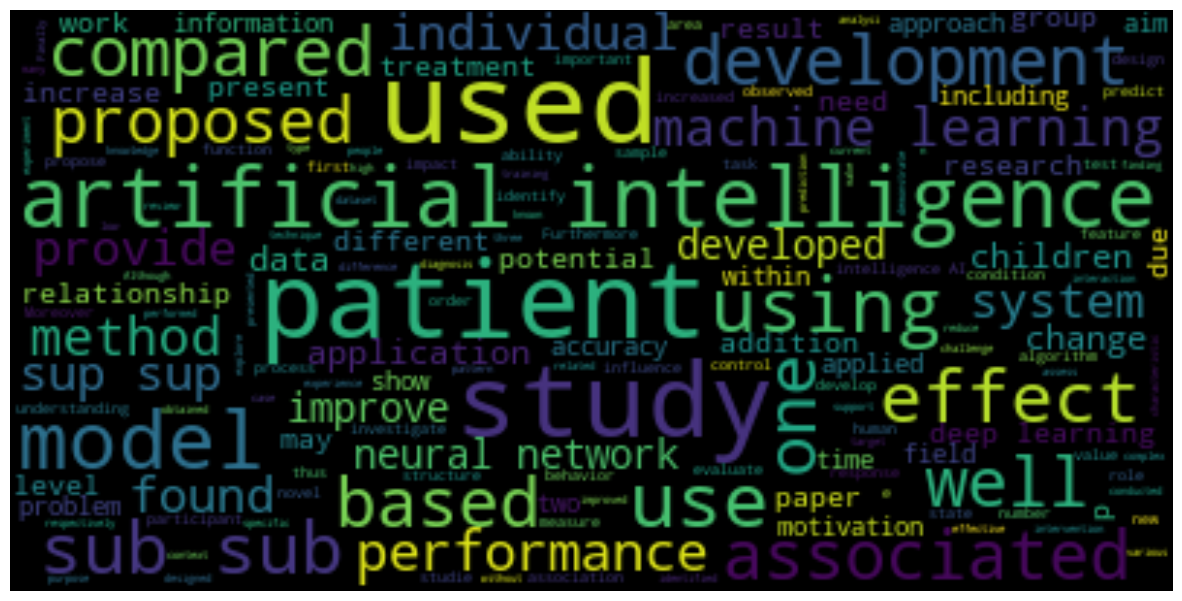

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()